In [18]:
a=(0,0)
b=(0,5)
c=(5,5)

In [19]:

import numpy as np
import matplotlib.pyplot as plt


(-1.0, 6.0)

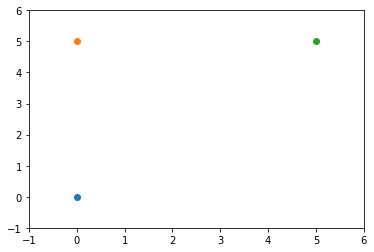

In [20]:
plt.scatter(a[0],a[1])
plt.scatter(b[0],b[1])
plt.scatter(c[0],c[1])
plt.xlim(-1,6)
plt.ylim(-1,6)

In [21]:
pltlist=[a,b,c,c]

In [22]:
x,y=zip(*pltlist)

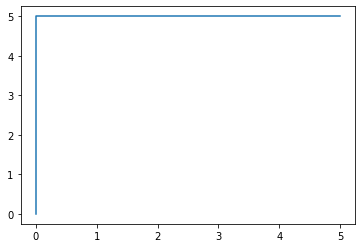

In [23]:
plt.plot(x,y)

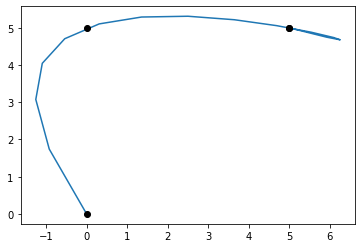

In [24]:
import numpy as np
from scipy.interpolate import interp1d # Different interface to the same function
import matplotlib.pyplot as plt

#pts = np.array([...]) # Your points

i = np.arange(len(x))

# 5x the original number of points
interp_i = np.linspace(0, i.max(), 5 * i.max())

xi = interp1d(i, x, kind='cubic')(interp_i)
yi = interp1d(i, y, kind='cubic')(interp_i)

fig, ax = plt.subplots()
ax.plot(xi, yi)
ax.plot(x, y, 'ko')
plt.show()

In [45]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np 
tck = interpolate.splrep(x[:-1], y[:-1])

TypeError: m > k must hold

In [40]:
x_new = np.linspace(min(x), max(x), 100)
y_fit = interpolate.BSpline(*tck)(x_new)

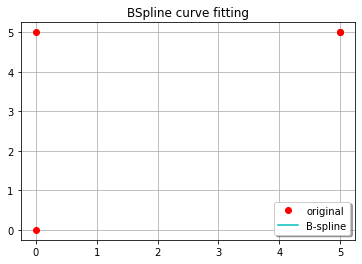

In [41]:
plt.title("BSpline curve fitting")
plt.plot(x, y, 'ro', label="original")
plt.plot(x_new, y_fit, '-c', label="B-spline")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 

 

In [42]:
tck

(array([0., 0., 0., 0., 5., 5., 5., 5.]),
 array([nan, nan, nan,  5.,  0.,  0.,  0.,  0.]),
 3)

In [44]:
# x_new